#### Samuel BIGOURIE /  Julian TRANI 2B

# <center>PROJET PRST 2020-2021</center>

## Sujet 1 : GCL RANDU et test spectral

Dans ce sujet, nous voulons tester le GCL RANDU dont les caractéristiques sont les suivantes :

Xn+1≡(65539×Xn) \[2<sup>31</sup>\] avec x0=12345

Pour cela nous allons utilisé les librairies python suivante :

In [49]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

Pour commencer nous posons les données de l'énoncé suivant :


In [50]:
# Données & Initialisation
a =65539
m = 2**31 # Modulo
donnees = 30000 # Nombre de données
x0 = 12345 # x0
GCL = [] # Xn+1 = (65539 * Xn ) [2^31] (RANDU)
GCL.append(x0) # GCL = [x0]

Il faut maintenant générer les 30.000 ère données. Pour cela on va utliser une fonction generate_GCL comme ceci :

In [51]:
def generate_GCL(_a, _m, _donnees):
    for n in range(1, _donnees):
        # Calcul de la valeur n de la suite
        res = (_a * GCL[n - 1]) % _m
        GCL.append(res)  # Ajout de la valeur dans

generate_GCL(a,m,donnees)

Nous avons maintenant dans la variable GCL notre suite pour 30000 données.
On va ensuite créer une suite Un tel que Un = Xn / 2<sup>31</sup>. Avec 2<sup>31</sup> qui est égal au modulo du GCL.
Voici le code python :

In [52]:
# Initialisation de la Suite Un
Un = [] # Un = Xn / [2^31]

# Génération de la suite Un
for element in GCL:
    # Calcul selon la formule
    res = element / m # Un = Xn / [2^31]
    Un.append(res)

Une fois que l'on a générer cette suite Un, nous allons faire passer le test du khi2 a ce GCL.
Pour cela et afin de faciliter la démarche, nous allons d'apport générer l'histogramme

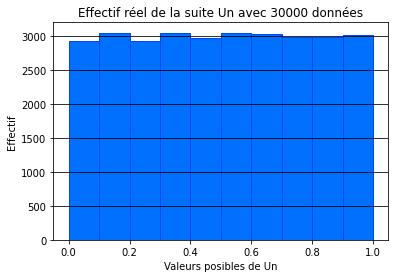

In [53]:
counts, bins, bars = plt.hist(Un, color='#0070FF', edgecolor='#0046FF') # Bins de 10 par défaut
plt.grid(axis='y' , color='black')
plt.xlabel('Valeurs posibles de Un')
plt.ylabel('Effectif')
plt.title('Effectif réel de la suite Un avec '+str(donnees) +' données')
plt.show()

En voyant ce graphique on peut supposer que le test du khi 2 risque de
passer.

En effet, nous avons ici un loi uniforme sur la valeur 3000 (valeur théorique
car on effectue 30.000 valeurs et nous avons 10 classes possibles, d'ou 30.000/10 = 3000).
Or, on peut observer qu'il y a pas de grand fructation au alentour de 3000

Vérifions maintenant notre hypothèse avec des calculs :

In [54]:
# Calcul du Khi
khi2 = 0
theorique = donnees/10 # Valeur théorique de la loi uniforme

# Addition afin d'obtenir la valeur du Khi
for element in counts:
    khi2 += (theorique - element)**2 / element

# On regarde dans le tableau, on a 9 de degres de liberté (10-1), et on prend un sueil de 1%
print("Valeur du khi2 = " + str(khi2))

Valeur du khi2 = 6.7887013143998125


Comme on peut le constater on obtient 6.78 comme valeur pour le khi-2

Or, on a 9 de degres de liberté (10-1) et on veut un seuil a 1%. Du coup d'apres le tableau, on a  :

![alt text]( ./tableau.jpg "Title")

On en conclut qu'il faut que la valeur du khi deux soit inferieur à 16.92. Or c'est notre cas, on peut alors considère le GCL avec 30000 passe le test du khi deux.

Passons maintenant au test spectral. Pour cela, on va réaliser un visualisation sur un graphique si on trouve une structure alors le test ne passe pas.

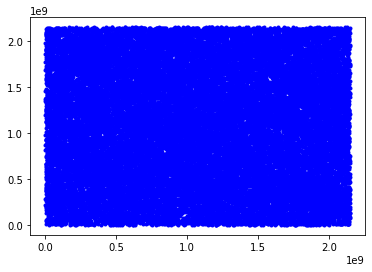

In [55]:
# Test Spectral 2D
plt.plot(GCL[0:len(GCL)-1], GCL[1:], 'b.')
plt.show()

Comme on peut le voir, il y a aucune structure. Donc on peut conclure que le test spectral 2D passe avec 30000 données

Passons maintenant au test spectral 3B, pour cela on va utiliser la librairie

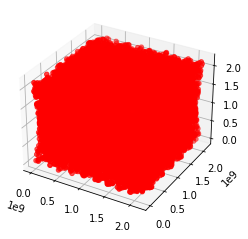

In [56]:
# Test Spectral 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Axes
x = GCL[0:len(GCL)-2]
y = GCL[1:len(GCL)-1]
z = GCL[2:]

ax.scatter(x,y,z, c='r' ,marker='o')
plt.show()

Dans l'état actuel, on pourrait penser que le GCL avec 30.000 données passe le test spectral 3D.
Or, si on trouve un peu la structure dans l'espace, on peut faire apparaitre une structure sous forme de plan, comme ceci :

<img src="images/tableau.png" width="50" height="50">

![alt text](https://gitlab.com/Rentei/projet-math/-/tree/master/images/tableau.png "Logo Title Text 1")

Récapitulons, le GCL avec 30.000 passe le test du khi2 et le test spectral 2D mais pas le test spectral 3B